In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
### ArchRProject 已经添加了motif注释
### 已经添加背景峰
## 计算偏离值
proj <- addDeviationsMatrix(
  ArchRProj = proj, 
  peakAnnotation = "Motif",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-147fce43b14800-Date-2025-02-26_Time-11-49-02.807832.log
If there is an issue, please report to github with logFile!

2025-02-26 11:49:11.09803 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2025-02-26 12:33:24.306978 : Completed Computing Deviations!, 44.358 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-147fce43b14800-Date-2025-02-26_Time-11-49-02.807832.log



DataFrame with 6 rows and 6 columns
     seqnames       idx        name combinedVars combinedMeans      rank
        <Rle> <integer> <character>    <numeric>     <numeric> <integer>
f357        z       357   FOXA1_357      73.9739   -0.68487213         1
f139        z       139    JUNB_139      69.5473    0.00676029         2
f651        z       651 SMARCC1_651      69.0441    0.03682018         3
f105        z       105   FOSL2_105      68.2244    0.01279015         4
f142        z       142   FOSL1_142      67.1625    0.01820884         5
f124        z       124    JUND_124      66.6101    0.01397854         6


Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


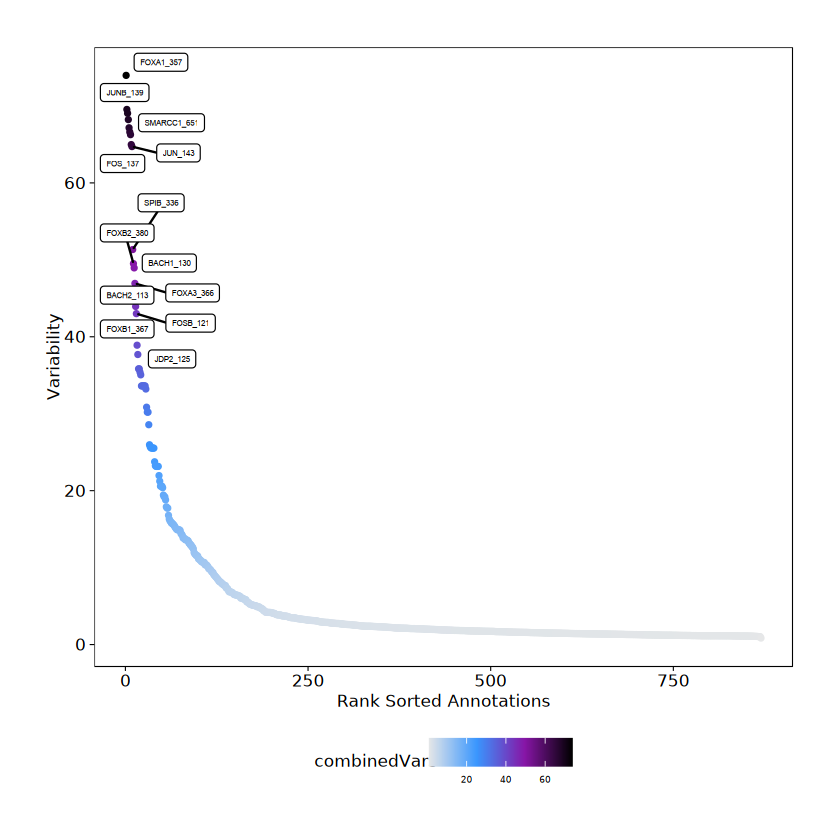

In [4]:
plotVarDev <- getVarDeviations(proj, name = "MotifMatrix", plot = TRUE)
plotVarDev

In [5]:
## 提取部分motif用于下游分析
### 在GRHL2中指出的motif
### 其中RUNX1/2, ETS在免疫细胞中富集；FOX, Ebox, E2A只在上皮细胞中富集
motifs <- c("RUNX1", "RUNX2", "ETS1", "ETS2", "FOXA1", "FOXA2", "Ebox", "E2A")
markerMotifs <- getFeatures(proj, select = paste(motifs, collapse = "|"), useMatrix = "MotifMatrix")
markerMotifs

[1] "z:RUNX1_733"          "z:RUNX2_732"          "z:FOXA1_357"         
 [4] "z:FOXA2_355"          "z:ETS2_340"           "z:ETS1_332"          
 [7] "deviations:RUNX1_733" "deviations:RUNX2_732" "deviations:FOXA1_357"
[10] "deviations:FOXA2_355" "deviations:ETS2_340"  "deviations:ETS1_332"

In [6]:
markerMotifs <- grep("z:", markerMotifs, value = TRUE)
markerMotifs

[1] "z:RUNX1_733" "z:RUNX2_732" "z:FOXA1_357" "z:FOXA2_355" "z:ETS2_340" 
[6] "z:ETS1_332"

In [7]:
p <- plotGroups(
  ArchRProj = proj, 
  groupBy = "majorType", 
  colorBy = "MotifMatrix", 
  name = markerMotifs,
  imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights



Getting Matrix Values...

2025-03-06 10:23:43.251828 : 



ArchR logging to : ArchRLogs/ArchR-imputeMatrix-3a00695e798df9-Date-2025-03-06_Time-10-23-52.076606.log
If there is an issue, please report to github with logFile!

Using weights on disk

Using weights on disk

1 
2 
3 
4 
5 
6 




In [8]:
p2 <- lapply(seq_along(p), function(x){
  if(x %% 6 != 1){
    p[[x]] + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6) +
    theme(plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
    theme(
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank()
    ) + ylab("")
  }else{
    p[[x]] + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6) +
    theme(plot.margin = unit(c(0.1, 0.1, 0.1, 0.1), "cm")) +
    theme(
        axis.ticks.y=element_blank(),
        axis.title.y=element_blank()
    ) + ylab("")
  }
})

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


In [11]:
options(repr.plot.width = 15, repr.plot.height =10)
# 将p2分割成每6个元素一组
p2_split <- split(p2, ceiling(seq_along(p2)/6))

# 对每一组元素，创建一个图形网格
p2_grids <- lapply(p2_split, function(p2_group) {
  do.call(cowplot::plot_grid, c(list(nrow = 1, rel_widths = rep(1, length(p2_group))), p2_group))
})

# 将所有的图形网格组合成一个图形网格
final_grid <- do.call(cowplot::plot_grid, c(list(nrow = length(p2_grids)), p2_grids))
svg("/data/hanxue/BCY_ATAC/joint_output/MotifPeaks-MajorType.svg", width = 15, height = 10 * ceiling(length(p2_grids)/6))
# 绘制最终的图形网格
print(final_grid)
dev.off()

Picking joint bandwidth of 0.196

Picking joint bandwidth of 0.199

Picking joint bandwidth of 0.302

Picking joint bandwidth of 0.294

Picking joint bandwidth of 0.162

Picking joint bandwidth of 0.134



pdf 
  2

In [14]:
plotPDF(p, name = "MotifPeaks-MajorType.pdf", ArchRProj = proj, addDOC = FALSE, width = 10, height = 8)

Plotting Ggplot!

Picking joint bandwidth of 0.196

Picking joint bandwidth of 0.196

Plotting Ggplot!

Picking joint bandwidth of 0.199

Picking joint bandwidth of 0.199

Plotting Ggplot!

Picking joint bandwidth of 0.302

Picking joint bandwidth of 0.302

Plotting Ggplot!

Picking joint bandwidth of 0.294

Picking joint bandwidth of 0.294

Plotting Ggplot!

Picking joint bandwidth of 0.162

Picking joint bandwidth of 0.162

Plotting Ggplot!

Picking joint bandwidth of 0.134

Picking joint bandwidth of 0.134



In [16]:
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "MotifMatrix", 
    name = sort(markerMotifs), 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3a006937af2bb6-Date-2025-03-06_Time-10-50-03.895553.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = MotifMatrix

Getting Matrix Values...

2025-03-06 10:50:04.229599 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3a006937af2bb6-Date-2025-03-06_Time-10-50-03.895553.log



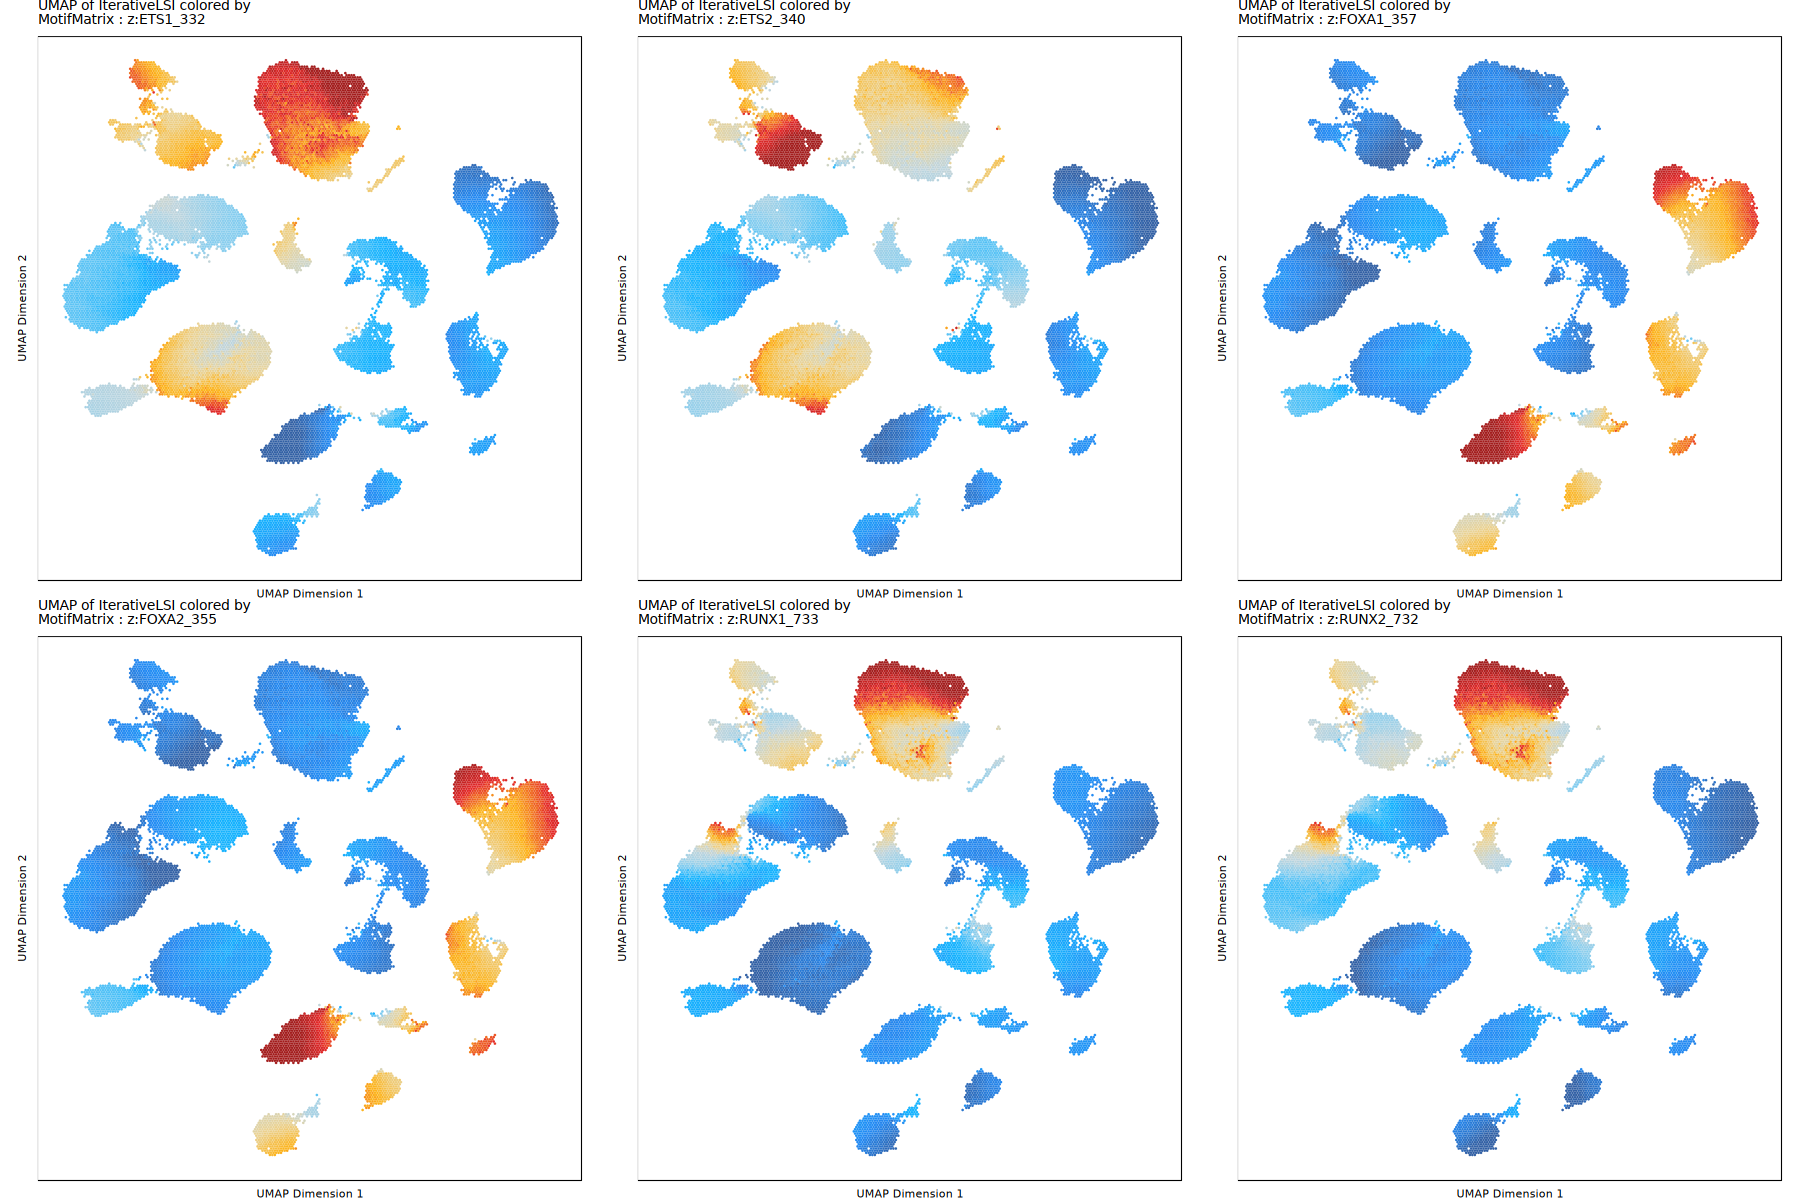

In [17]:
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [18]:
plotPDF(plotList = p, 
    name = "Plot-UMAP-Motif.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



In [13]:
## 为了比较TF偏差或z-score 与 对应TF基因的基因得分推断的表达量之间的关系
### 将两者绘制到同一UMAP中
markerRNA <- getFeatures(proj, select = paste(motifs, collapse="|"), useMatrix = "GeneScoreMatrix")
markerRNA <- markerRNA[markerRNA %ni% c("SLC35E2A","LCE2A","PDE2A","SEBOX","UBE2A")]
markerRNA

[1] "ETS1"     "ETS1-AS1" "FOXA1"    "FOXA2"    "RUNX1"    "ETS2"     "RUNX2"   
[8] "RUNX1T1"

In [14]:
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = sort(markerRNA), 
    embedding = "UMAP"
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-147fce5e38202c-Date-2025-02-26_Time-12-35-17.836535.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-02-26 12:35:19.197465 : 



Imputing Matrix

Using weights on disk



R_zmq_msg_send errno: 4 strerror: Interrupted system call


Using weights on disk



R_zmq_msg_send errno: 4 strerror: Interrupted system call


Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-147fce5e38202c-Date-2025-02-26_Time-12-35-17.836535.log



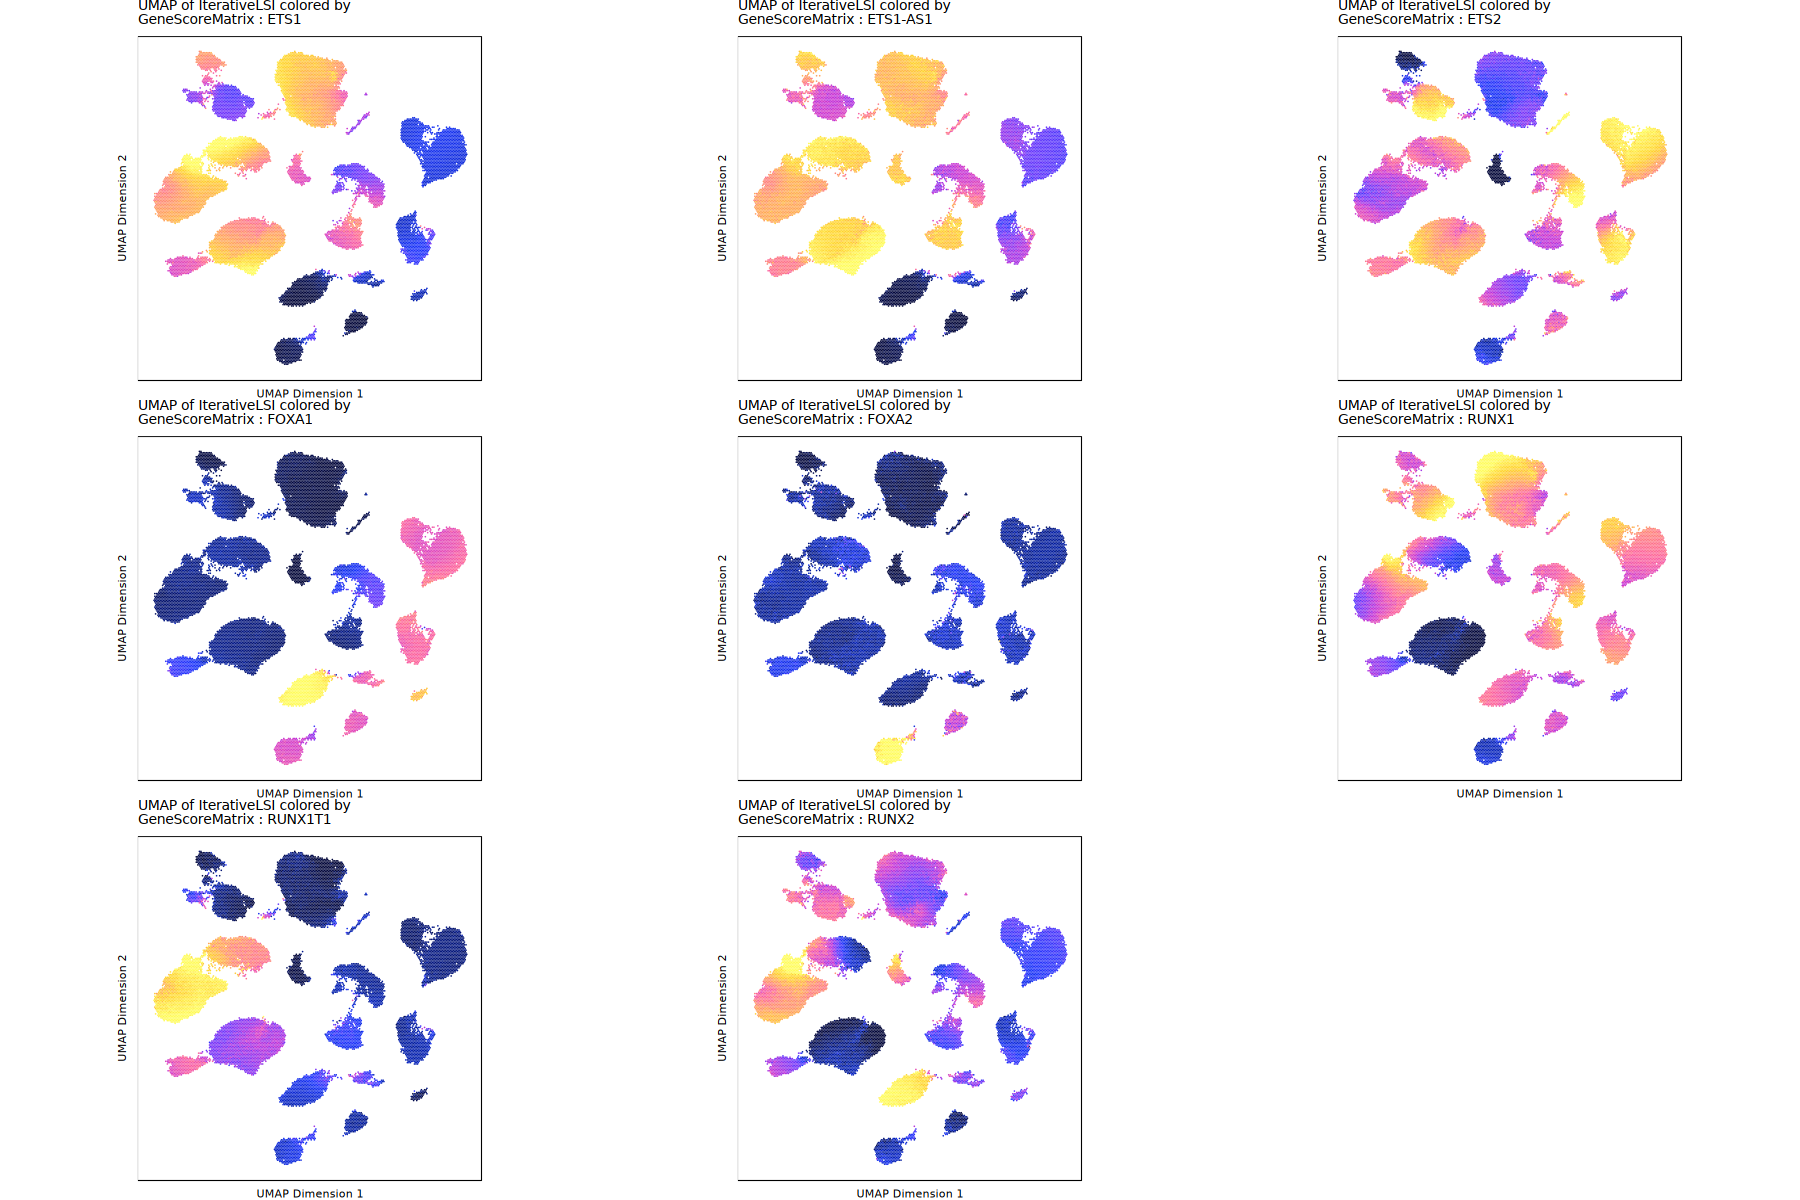

In [15]:
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [16]:
## peak注释计算偏移
### Encode TFBS
proj <- addDeviationsMatrix(
  ArchRProj = proj, 
  peakAnnotation = "EncodeTFBS",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-147fce3c4d19d-Date-2025-02-26_Time-12-35-47.858136.log
If there is an issue, please report to github with logFile!

2025-02-26 12:36:02.106694 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2025-02-26 13:40:29.984742 : Completed Computing Deviations!, 64.702 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-147fce3c4d19d-Date-2025-02-26_Time-12-35-47.858136.log



DataFrame with 6 rows and 6 columns
     seqnames       idx                 name combinedVars combinedMeans
        <Rle> <integer>          <character>    <numeric>     <numeric>
f272        z       272 272.FOXA1_S-T_47D...      130.254     -0.571917
f273        z       273 273.GATA3_S-T_47D...      129.827     -0.643977
f571        z       571 571.GATA3_S-MCF_7...      117.070     -0.834774
f270        z       270 270.ERalpha-T_47D...      113.778     -0.802031
f271        z       271 271.ERalpha-T_47D...      113.672     -0.802199
f574        z       574  574.ZNF217-MCF_7...      113.252     -0.850012
          rank
     <integer>
f272         1
f273         2
f571         3
f270         4
f271         5
f574         6


Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


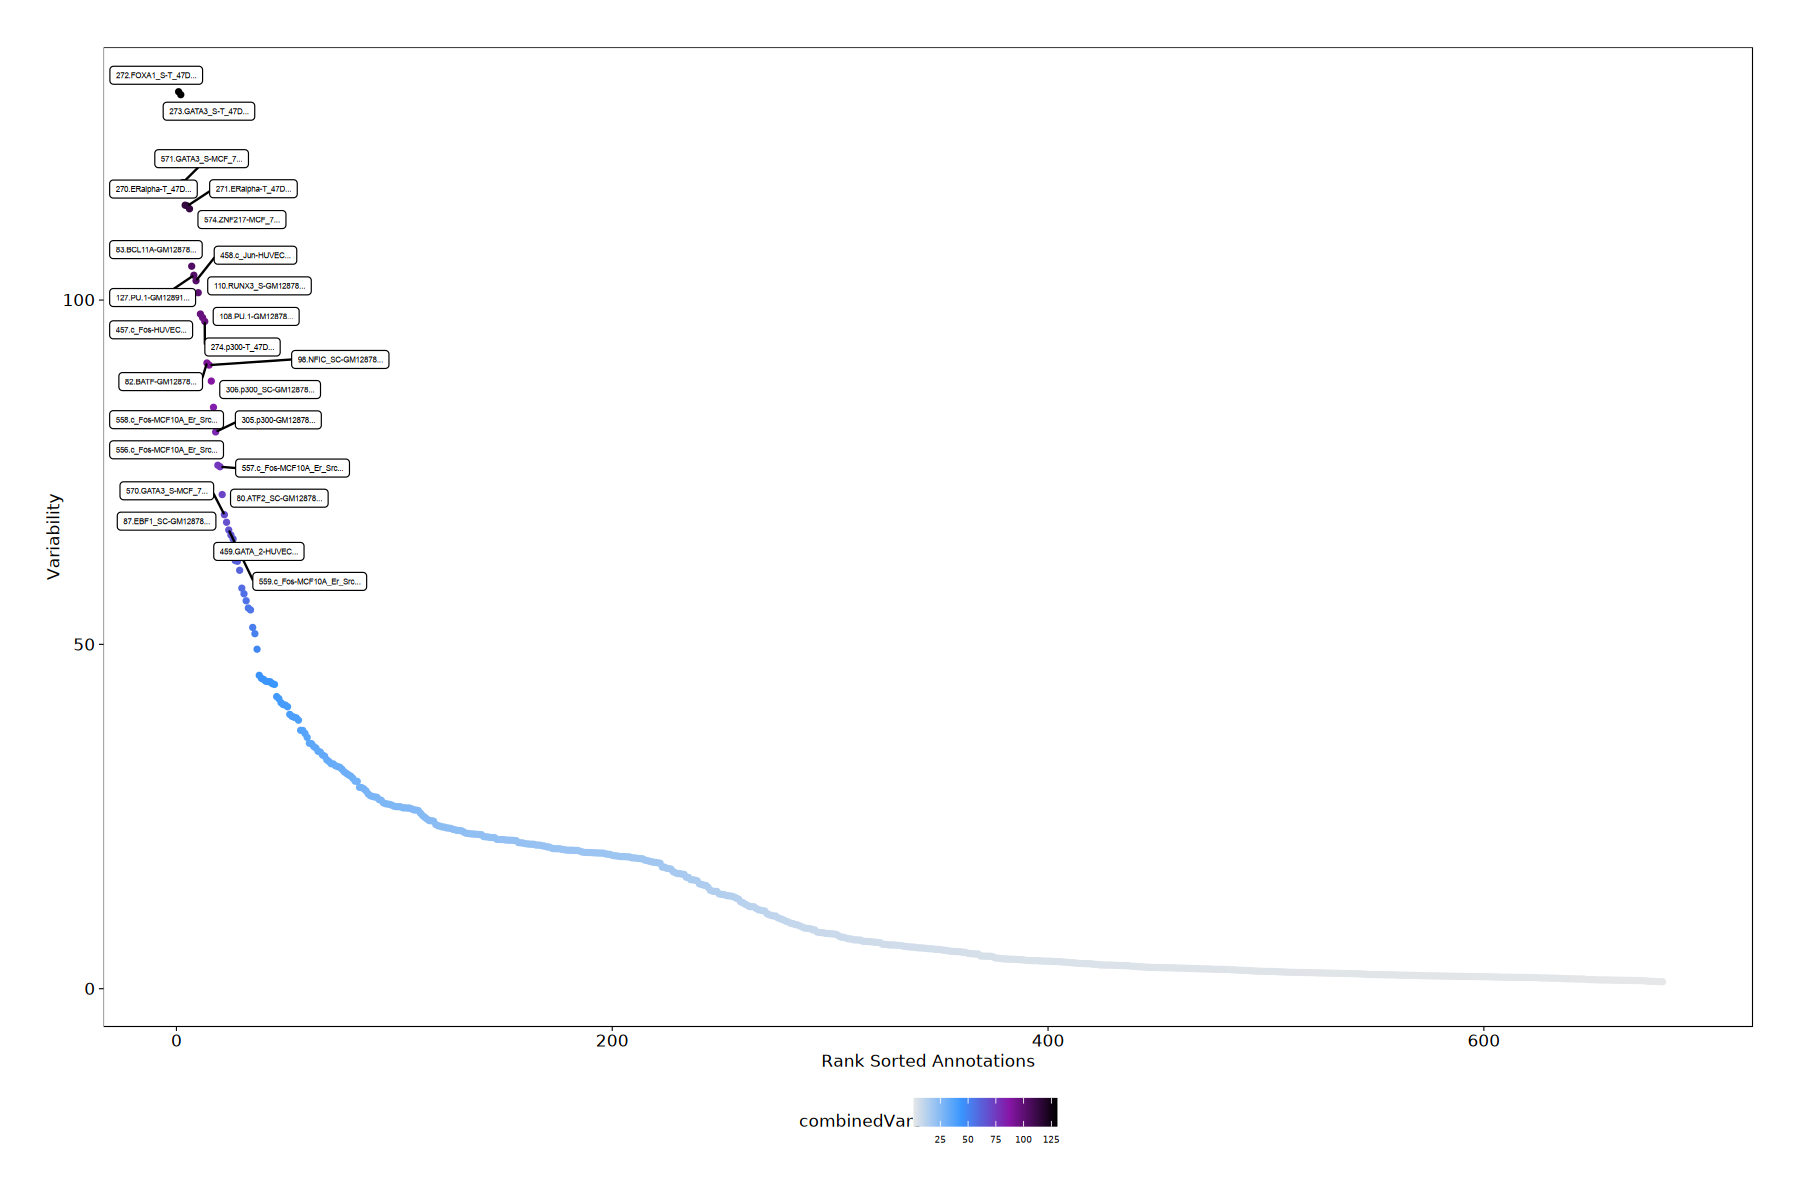

In [17]:
plotVarDev <- getVarDeviations(proj, plot = TRUE, name = "EncodeTFBSMatrix")
plotVarDev

In [18]:
tfs <- c("RUNX1", "RUNX2", "ETS1", "ETS2", "FOXA1", "FOXA2", "Ebox", "E2A")
markerTFs <- getFeatures(proj, select = paste(tfs, collapse = "|"), useMatrix = "EncodeTFBSMatrix")
markerTFs
markerTFs <- sort(grep("z:", markerTFs, value = TRUE))
markerTFs

[1] "z:272.FOXA1_S-T_47D..."          "z:219.ETS1-K562..."             
 [3] "z:180.FOXA2_S-HepG2..."          "z:179.FOXA1_S-HepG2..."         
 [5] "z:178.FOXA1_S-HepG2..."          "z:90.ETS1-GM12878..."           
 [7] "z:77.FOXA1_S-ECC_1..."           "z:54.FOXA1_S-A549..."           
 [9] "z:52.ETS1-A549..."               "deviations:272.FOXA1_S-T_47D..."
[11] "deviations:219.ETS1-K562..."     "deviations:180.FOXA2_S-HepG2..."
[13] "deviations:179.FOXA1_S-HepG2..." "deviations:178.FOXA1_S-HepG2..."
[15] "deviations:90.ETS1-GM12878..."   "deviations:77.FOXA1_S-ECC_1..." 
[17] "deviations:54.FOXA1_S-A549..."   "deviations:52.ETS1-A549..."

[1] "z:178.FOXA1_S-HepG2..." "z:179.FOXA1_S-HepG2..." "z:180.FOXA2_S-HepG2..."
[4] "z:219.ETS1-K562..."     "z:272.FOXA1_S-T_47D..." "z:52.ETS1-A549..."     
[7] "z:54.FOXA1_S-A549..."   "z:77.FOXA1_S-ECC_1..."  "z:90.ETS1-GM12878..."

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-147fce2960a1e5-Date-2025-02-26_Time-13-40-33.743934.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = EncodeTFBSMatrix

Getting Matrix Values...

2025-02-26 13:40:33.956907 : 



Imputing Matrix

Using weights on disk



R_zmq_msg_send errno: 4 strerror: Interrupted system call


Using weights on disk



R_zmq_msg_send errno: 4 strerror: Interrupted system call


Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-147fce2960a1e5-Date-2025-02-26_Time-13-40-33.743934.log



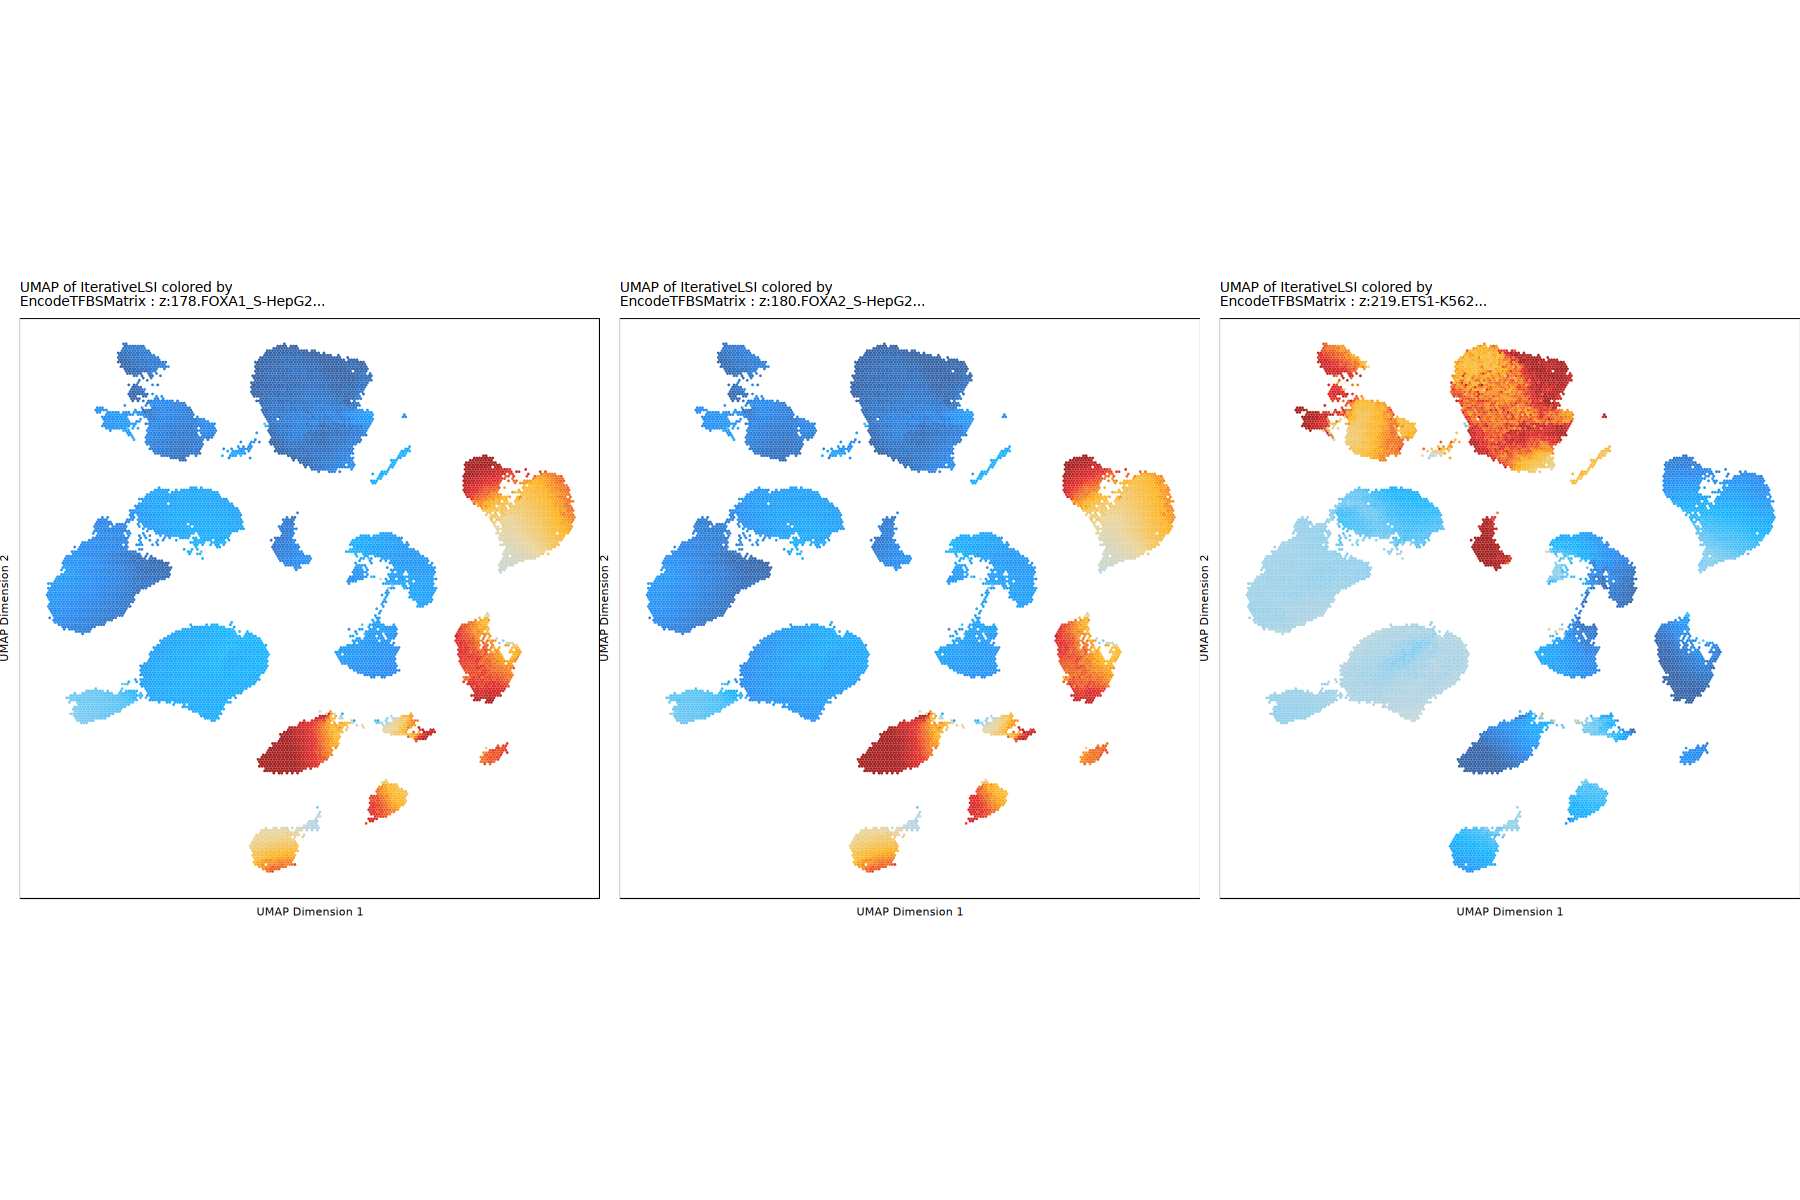

In [19]:
TFnames <- stringr::str_split(stringr::str_split(markerTFs, pattern = "\\.", simplify=TRUE)[,2], pattern = "-", simplify = TRUE)[,1]
markerTFs <- markerTFs[!duplicated(TFnames)]
p <- plotEmbedding(
  ArchRProj = proj, 
  colorBy = "EncodeTFBSMatrix", 
  name = markerTFs, 
  embedding = "UMAP",
  imputeWeights = getImputeWeights(proj)
)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
  theme_ArchR(baseSize = 6.5) +
  theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
  theme(
      axis.text.x=element_blank(), 
      axis.ticks.x=element_blank(), 
      axis.text.y=element_blank(), 
      axis.ticks.y=element_blank()
  )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [20]:
### Bulk ATAC
proj <- addDeviationsMatrix(
  ArchRProj = proj, 
  peakAnnotation = "ATAC",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-147fce77cac5d3-Date-2025-02-26_Time-13-40-47.4382.log
If there is an issue, please report to github with logFile!

2025-02-26 13:40:53.514515 : Batch Execution w/ safelapply!, 0 mins elapsed.

###########
2025-02-26 14:15:36.316783 : Completed Computing Deviations!, 34.815 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-addDeviationsMatrix-147fce77cac5d3-Date-2025-02-26_Time-13-40-47.4382.log



In [21]:
plotVarDev <- getVarDeviations(proj, plot = TRUE, name = "ATACMatrix")

DataFrame with 6 rows and 6 columns
    seqnames       idx                  name combinedVars combinedMeans
       <Rle> <integer>           <character>    <numeric>     <numeric>
f23        z        23 IAtlas_T_CD8posEffMem     107.8352    -0.0674982
f22        z        22 IAtlas_T_CD8posCenMem     105.5117    -0.0712233
f86        z        86              Heme_CD8     105.4116    -0.0653779
f25        z        25   IAtlas_T_GammaDelta     101.8894    -0.0685374
f21        z        21       IAtlas_T_CD8pos      94.8036    -0.0762009
f33        z        33 IAtlas_T_Th1Precursor      94.3608    -0.0773082
         rank
    <integer>
f23         1
f22         2
f86         3
f25         4
f21         5
f33         6


In [22]:
ATACPeaks <- c("RUNX1", "RUNX2", "ETS1", "ETS2", "FOXA1", "FOXA2", "Ebox", "E2A")
getFeatures(proj, select = paste(ATACPeaks, collapse="|"), useMatrix = "ATACMatrix")

character(0)

In [ ]:
markerATAC <- getFeatures(proj, select = paste(ATACPeaks, collapse="|"), useMatrix = "ATACMatrix")
markerATAC <- sort(grep("z:", markerATAC, value = TRUE))
markerATAC

character(0)

In [25]:
# markerATAC为空
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "ATACMatrix", 
    name = markerATAC, 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-147fce6f00325-Date-2025-02-27_Time-01-59-37.454709.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = ATACMatrix

Getting Matrix Values...

2025-02-27 01:59:38.851238 : 



***
2025-02-27 01:59:41.029288 : ERROR Found in .getMatFromArrow for  
LogFile = ArchRLogs/ArchR-plotEmbedding-147fce6f00325-Date-2025-02-27_Time-01-59-37.454709.log

<simpleError in `rownames<-`(`*tmp*`, value = new_rownames): invalid rownames length>

************************************************************



Warning message in mclapply(..., mc.cores = threads, mc.preschedule = preschedule):
“11 function calls resulted in an error”


ERROR: Error in .safelapply(seq_along(cellNamesList), function(x) {: 
Error Found Iteration 1 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 2 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 3 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 4 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 5 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 6 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 7 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 8 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 9 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 10 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>
Error Found Iteration 11 : 
	[1] "Error in .logError(e, fn = \".getMatFromArrow\", info = \"\", errorList = errorList,  : \n  Exiting See Error Above\n"
	<simpleError in .logError(e, fn = ".getMatFromArrow", info = "", errorList = errorList,     logFile = logFile): Exiting See Error Above>



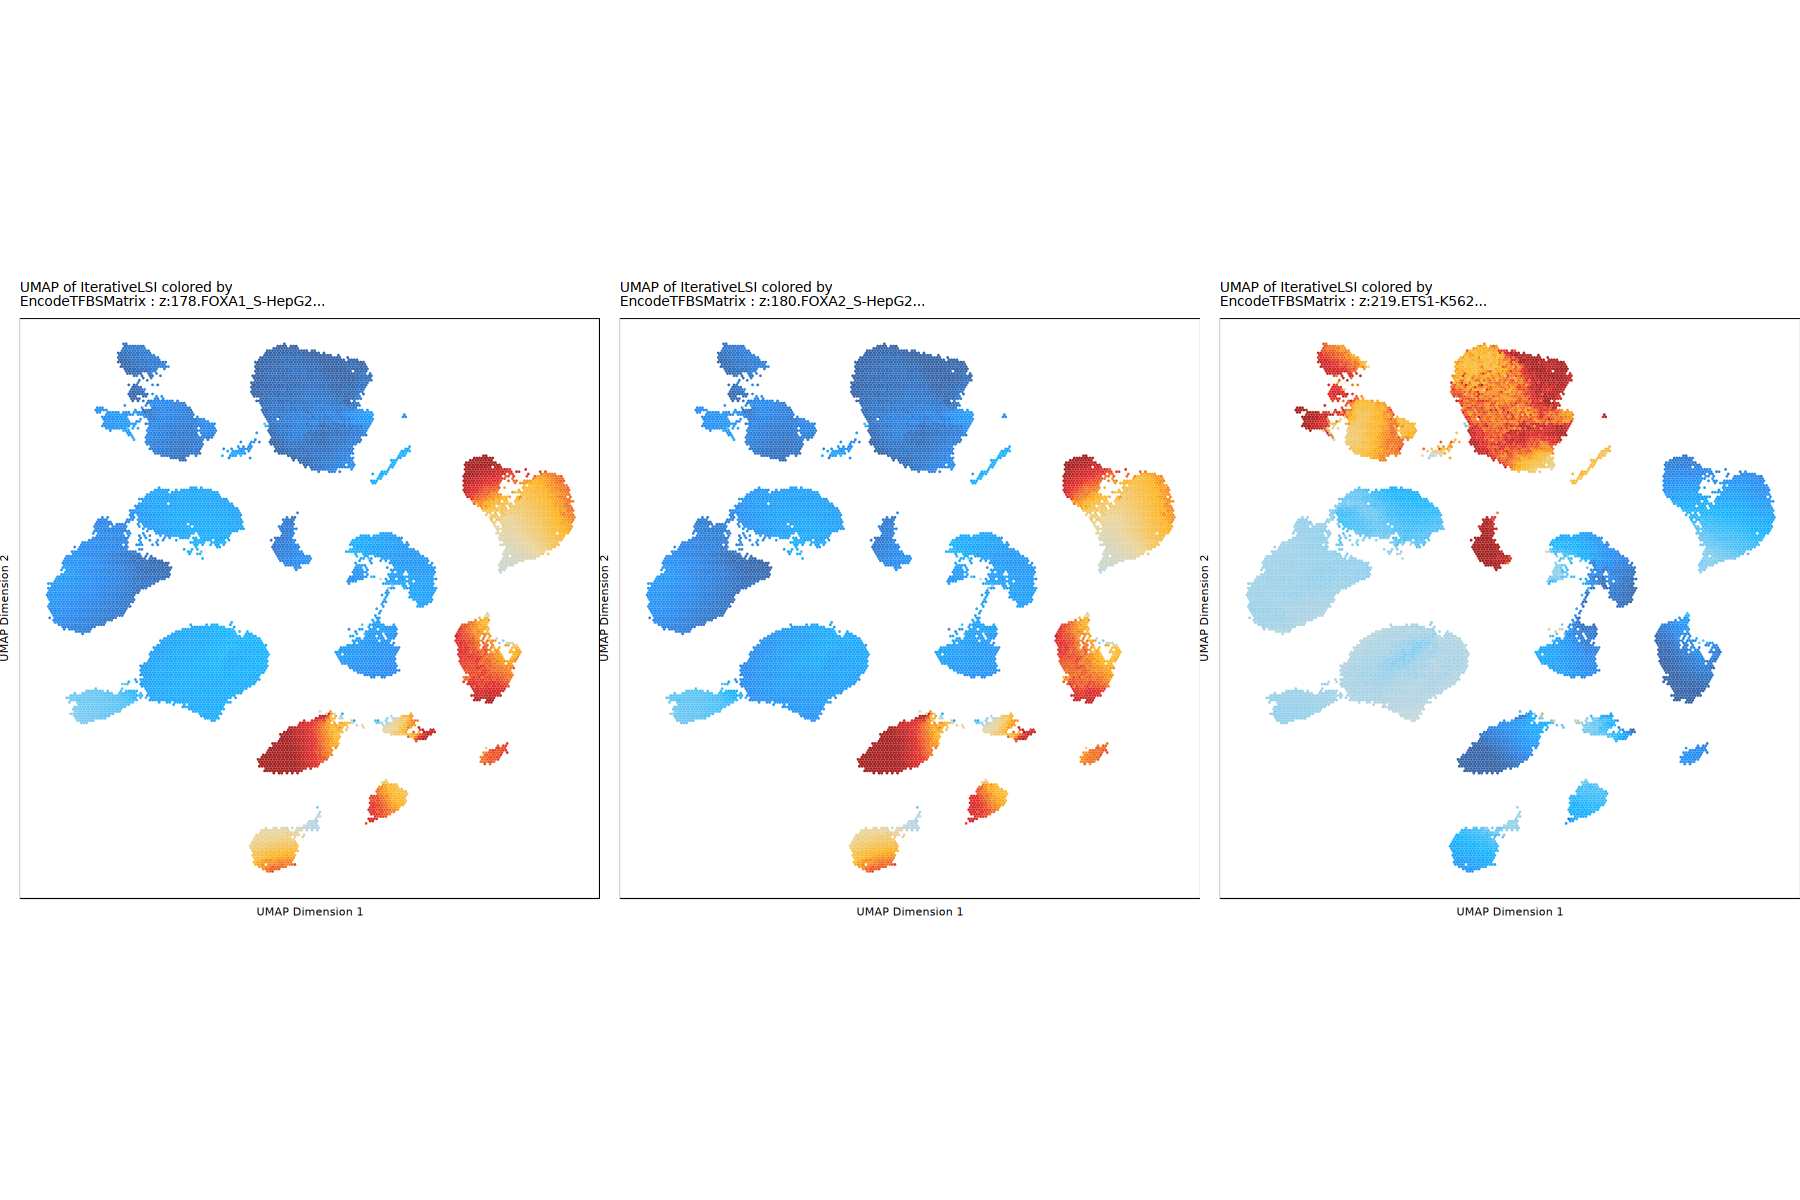

In [26]:
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [30]:
## 保存结果
saveArchRProject(proj, load = FALSE)

Saving ArchRProject...

